In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA

np.random.seed(42)

/home/inderjeet78/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


# Training data prepration

In [3]:
c1_x = mnist.train.images[mnist.train.labels==7]
c1_y = mnist.train.labels[mnist.train.labels==7]
c1_y = c1_y[:,None]
other_x = mnist.train.images[mnist.train.labels!=7]
other_y = mnist.train.labels[mnist.train.labels!=7]
other_y=other_y[:,None]

np.random.seed(42)
c1 = np.concatenate((c1_x,c1_y),axis=1)
others = np.concatenate((other_x,other_y), axis=1)
print(c1.shape)
print(others.shape)
print(others)
np.random.shuffle(others)
others = np.array(others)
print(others.shape)
others321 = others[0:321,:]
print(others321.shape)
train = np.concatenate((c1,others321),axis=0)
np.random.shuffle(train)
X_train = train[:,0:-1]
Y_train = train[:,-1]
Y_train[Y_train==0]=1
Y_train[Y_train==7]=0
Y_train[Y_train!=0]=1

sum(Y_train)

# Validation data prepration

np.random.seed(42)
valX_ones = mnist.validation.images[mnist.validation.labels==7]
valY_ones = mnist.validation.labels[mnist.validation.labels==7]
valX_others = mnist.validation.images[mnist.validation.labels!=7]
valY_others = mnist.validation.labels[mnist.validation.labels!=7]
valY_ones = valY_ones[:,None]
valY_others = valY_others[:,None]
val_ones = np.concatenate((valX_ones,valY_ones),axis=1)
val_others = np.concatenate((valX_others,valY_others),axis=1)
np.random.shuffle(val_others)
val_others137 = val_others[0:137,:]
val = np.concatenate((val_ones,val_others137),axis=0)
np.random.shuffle(val)
valX = val[:,0:-1]
valY = val[:,-1]
valY[valY==0]=1
valY[valY==7]=0
valY[valY!=0]=1

sum(valY)

# Test data prepration

np.random.seed(42)
testX_ones = mnist.test.images[mnist.test.labels==7]
testY_ones = mnist.test.labels[mnist.test.labels==7]
testX_others = mnist.test.images[mnist.test.labels!=7]
testY_others = mnist.test.labels[mnist.test.labels!=7]
testY_ones = testY_ones[:,None]
testY_others = testY_others[:,None]
test_ones = np.concatenate((testX_ones,testY_ones),axis=1)
test_others = np.concatenate((testX_others,testY_others),axis=1)
np.random.shuffle(test_others)
test_others137 = test_others[0:137,:]
test = np.concatenate((test_ones,test_others137),axis=0)
np.random.shuffle(test)
testX = test[:,0:-1]
testY = test[:,-1]
testY[testY==0]=1
testY[testY==7]=0
testY[testY!=0]=1

(5715, 785)
(49285, 785)
[[0. 0. 0. ... 0. 0. 3.]
 [0. 0. 0. ... 0. 0. 4.]
 [0. 0. 0. ... 0. 0. 6.]
 ...
 [0. 0. 0. ... 0. 0. 5.]
 [0. 0. 0. ... 0. 0. 6.]
 [0. 0. 0. ... 0. 0. 8.]]
(49285, 785)
(321, 785)


# Cross validation

In [1]:
"""rf = RandomForestClassifier(random_state=21,class_weight='balanced')
param_grid = {'n_estimators': range(0,500),'min_samples_split':range(2,500)}
CV_lr = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,scoring='f1',n_jobs=-1)
CV_lr.fit(X=X_train,y=Y_train)
best_param = CV_lr.best_params_
print("Best Paramters for Random Forest: ",best_param)"""

'rf = RandomForestClassifier(random_state=21,class_weight=\'balanced\')\nparam_grid = {\'n_estimators\': range(0,500),\'min_samples_split\':range(2,500)}\nCV_lr = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,scoring=\'f1\',n_jobs=-1)\nCV_lr.fit(X=X_train,y=Y_train)\nbest_param = CV_lr.best_params_\nprint("Best Paramters for Random Forest: ",best_param)'

# Testing

In [4]:
rf = RandomForestClassifier(n_estimators=51,min_samples_split=99,random_state=21,class_weight='balanced')
rf.fit(X_train,Y_train)
y_pred1 = rf.predict(valX)
y_pred2 = rf.predict(testX)
print ("Score on train set is: ", accuracy_score(valY,y_pred1))
print ("Score for test data is", accuracy_score(testY,y_pred2))
print("Classification report for train set")
print(classification_report(valY,y_pred1))
print("Confusion matrix for train set")
print(confusion_matrix(valY,y_pred1))
print("Confusion matrix for train set")
print(confusion_matrix(testY,y_pred2))
print("Classification report for test set")
print(classification_report(testY,y_pred2))

Score on train set is:  0.9665211062590975
Score for test data is 0.951931330472103
Classification report for train set
             precision    recall  f1-score   support

        0.0       0.99      0.97      0.98       550
        1.0       0.88      0.96      0.92       137

avg / total       0.97      0.97      0.97       687

Confusion matrix for train set
[[532  18]
 [  5 132]]
Confusion matrix for train set
[[979  49]
 [  7 130]]
Classification report for test set
             precision    recall  f1-score   support

        0.0       0.99      0.95      0.97      1028
        1.0       0.73      0.95      0.82       137

avg / total       0.96      0.95      0.95      1165



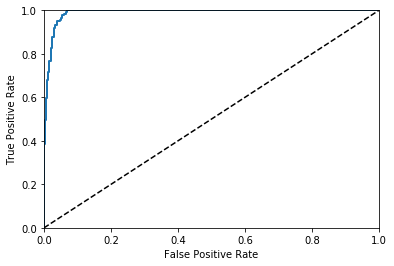

ROC AUC score is:  0.989604930557528


In [5]:
# ROC AUC Curve(
score = rf.predict_proba(testX)
score = score[:,1]
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds = roc_curve(testY,score)
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr,tpr)
plt.show()


print("ROC AUC score is: ",roc_auc_score(testY,score))


